# Test grilă

Link: https://forms.office.com/e/gC4AW0Ez7E

# Exerciții

Upload soluții: https://forms.gle/SgvCpNUBKzfMg2pT6

_Observație:_ Structura claselor de mai jos este doar o sugestie. Puteți propune / lucra cu orice variație a acestei structuri cât timp respectați principiile POO și aveți echivalențe pentru toate funcțiile cerute. Nu se acceptă echivalențe pentru operatori sau metode _built-in_.

## 1. Clasele Graf & Nod
---

Definiți o clasă Nod, care va reprezenta un nod dintr-un arbore de parcurgere, cu câmpurile: 
* informație - parametru cu tip oarecare;
* părinte - obiect de tip Nod;
* succesori - listă de obiecte de tip Nod.

Implementați următoarele metode _built-in_:
* constructor - definiți valoarea implicită a părintelui "None";
* transformarea în obiect de tip string a informației nodului curent;
* transformarea în obiect de tip string a informației elementelor dintr-o listă. Fiecare element va avea forma "c (a -> b -> c)", unde c e informația nodului curent, iar a, b și c sunt informațiile nodurilor din drumul de la rădăcina _a_ către el.

Implementați următoarele funcții:
* *drumRadacina()* - care va returna o listă cu toate nodurile ca obiecte (nu informația nodurilor) de la rădăcină până la nodul curent;
* *vizitat()* - care verifică dacă nodul a fost vizitat pe drumul curent (nu în tot arborele). Așadar, dacă informația se mai găsește în drumul de dinaintea nodului curent, returnăm True. altfel False.

In [1]:
# nod din arborele de parcurgere
class Node:
    def __init__(self, info, parent=None):
        self.info = info
        self.parent = parent

    def __str__(self):
        return "a={} b={}".format(self.info, self.parent)

    def __repr__(self):
        return "({}, {})".format(self.info, self.parent)

    def path_root(self):
        """
        :return: List of nodes as Node objects from root to current node.
        """
        node = self
        path = []
        while node is not None:
            path.insert(0, node)
            node = node.parent
        return path

    def visited(self):
        """
        :return: True if the node has been visited on the current path, False otherwise.
        """
        node = self
        while node.parent is not None:
            if node.info == node.parent.info:
                return True
            node = node.parent
        return False

    def __repr__(self):
        return "{} ({})".format(
            self.info, "->".join([str(x) for x in self.path_root()])
        )

    def __str__(self):
        return str(self.info)

Definiți o clasă Graf, care va reprezenta un graf orientat ponderat, cu câmpurile:
* nodStart - rădăcina arborelui
* noduriScop - lista nodurilor scop
* muchii - metodă la alegere din: listă de vecini, matrice de adiacența, listă de noduri și muchii etc.

Implementați constructorul clasei și următoarele funcții:
* *scop(nod)* - primește informația unui nod și verifică dacă e nod scop
* *succesori(nod)* - primește un nod al arborelui de parcurgere și returnează lista succesorilor direcți ai nodului care nu au fost vizitați pe ramura curentă. Această metodă va fi folosită în algoritmii pentru generarea arborelui de căutare.

In [2]:
class Graph:
    def __init__(self, matrix, start, scopes):
        self.matrix = matrix
        self.start = start
        self.scopes = scopes

    def scope(self, info_node):
        return info_node in self.scopes

    def succesors(self, node):
        list_succesors = []
        for i in range(len(self.matrix[node.info])):
            if self.matrix[node.info][i] == 1:
                new_node = Node(i, node)
                if not new_node.visited():
                    list_succesors.append(new_node)
        return list_succesors

## 2. BFS (Breadth-First Search)

---

Implementați tehnica de căutare BFS pentru un element de tip Graf definit ca mai sus. Se va citi de la tastatură un număr n și se vor afișa doar primele n soluții ale algoritmului.

_Observație:_ Considerați pseudocodul din fișierul de teorie.

In [3]:
def bfs(graph, number_of_solutions):
    queue = [Node(graph.start)]

    while queue:
        current_node = queue.pop(0)
        if graph.scope(current_node.info):
            print(repr(current_node))
            number_of_solutions -= 1
            if not number_of_solutions:
                return
        list_succesors = graph.succesors(current_node)
        queue += list_succesors

## 3. DFS (Depth-First Search) $-$ recursiv

---

Implementați tehnica de căutare DFS recursiv pentru un element de tip Graf definit ca mai sus. Se va citi de la tastatură un număr n și se vor afișa doar primele n soluții.

_Observație:_ Considerați pseudocodul din fișierul de teorie.

In [4]:
def dfs(graph, node, visited, n, solutions):
    visited.add(node.info)

    if graph.scope(node.info):
        solutions.append(node)
        if len(solutions) == n:
            return

    list_succesors = graph.succesors(node)
    for successor in list_succesors:
        if successor.info not in visited and len(solutions) < n:
            dfs(graph, successor, visited, n, solutions)

# Testare BFS si DFS

In [5]:
m = [
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
]

start = 0
scopes = [5, 9]

graph = Graph(m, start, scopes)

print("BFS:")
bfs(graph, 3)
print("--------------------")
print("DFS:")
visited = set()
solutions = []
dfs(graph, Node(start), visited, 3, solutions)
for solution in solutions:
    print(repr(solution))

BFS:
5 (0->1->5)
5 (0->1->2->5)
9 (0->4->7->9)
--------------------
DFS:
5 (0->1->2->5)
9 (0->1->2->7->9)


## 4. DFS (Depth-First Search) $-$ iterativ

---

Implementați tehnica de căutare DFS iterativ pentru un element de tip Graf definit ca mai sus. Se va citi de la tastatură un număr n și se vor afișa doar primele n soluții.

_Observație:_ Considerați pseudocodul din fișierul de teorie.

In [6]:
def dfs(graph, number_of_solutions):
    visited = set()
    stack = [Node(graph.start)]

    while stack:
        node = stack.pop()
        visited.add(node.info)

        if graph.scope(node.info):
            print(repr(node))
            number_of_solutions -= 1
            if not number_of_solutions:
                return

        list_succesors = graph.succesors(node)
        for successor in list_succesors:
            if successor.info not in visited:
                stack.append(successor)

## Ajutor

---

Acest graf este doar un exemplu dacă nu aveți inspirație. Recomand testarea funcțiilor pe un subarbore al lui.

Index:
* nodStart - nodul 0 (galben)
* noduriScop - [4, 6] (mov)
* informațiile din cercuri - informația fiecărui nod
* informațiile de pe muchii - costul drumurilor
* informațiile din pătrate - irelevante pe moment

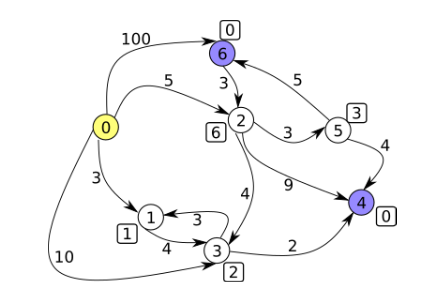
